It is image classification implemented on Cifer 10 a Dataset from Hugging Face and A CNN was implemented. It achieved a accuracy of 71%.

#Installation

In [32]:
!pip install tensorflow

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

#Dataset

In [34]:
from tensorflow.keras.datasets import cifar10

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [35]:
import numpy as np

# Check the unique values in the labels
unique_labels = np.unique(train_labels)
print("Unique labels in training data:", unique_labels)

# Ensure that labels are in the range [0, num_classes - 1]
num_classes = 10
if unique_labels.max() >= num_classes:
    print("Labels need preprocessing.")
    # Preprocess the labels (assuming they are originally 1-based)
    train_labels = train_labels - 1
    test_labels = test_labels - 1
    unique_labels = np.unique(train_labels)
    print("Unique labels after preprocessing:", unique_labels)

Unique labels in training data: [0 1 2 3 4 5 6 7 8 9]


In [36]:
unique_test_labels = np.unique(test_labels)
print("Unique labels in test data:", unique_test_labels)
print("Sample test labels:", test_labels[:30])

Unique labels in test data: [0 1 2 3 4 5 6 7 8 9]
Sample test labels: [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]]


# Implementing CNN

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# Now train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 97s 60ms/step - loss: 1.5054 - accuracy: 0.4501 - val_loss: 1.3302 - val_accuracy: 0.5245
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1497 - accuracy: 0.5936 - val_loss: 1.1118 - val_accuracy: 0.6071
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9975 - accuracy: 0.6501 - val_loss: 0.9572 - val_accuracy: 0.6679
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9022 - accuracy: 0.6822 - val_loss: 1.0170 - val_accuracy: 0.6500
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8348 - accuracy: 0.7074 - val_loss: 0.8789 - val_accuracy: 0.6954
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7799 - accuracy: 0.7272 - val_loss: 0.8738 - val_accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7297 - accuracy: 0.7450 - val_loss: 0.8529 -

# Score

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 4s - loss: 0.8700 - accuracy: 0.7117 - 4s/epoch - 13ms/step

Test accuracy: 0.7117000222206116


In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 3s - loss: 0.8700 - accuracy: 0.7117 - 3s/epoch - 11ms/step

Test accuracy: 0.7117000222206116


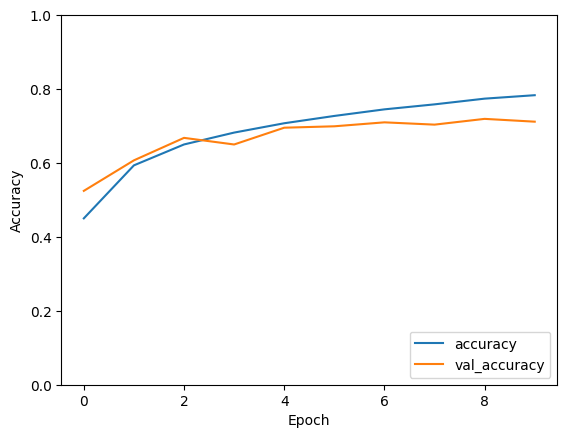

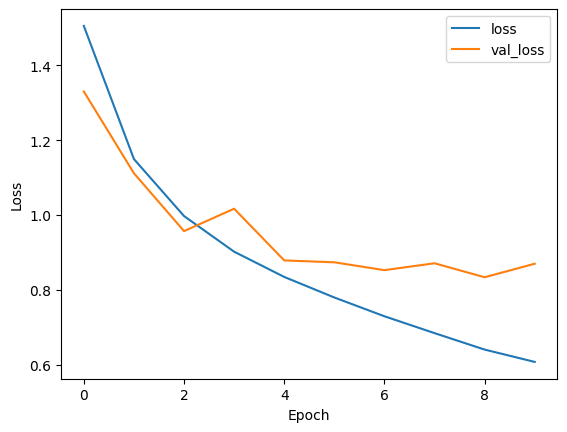

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()